In [25]:
import pandas as pd
import numpy as np

import pickle

import matplotlib.pyplot as plt
import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity

import warnings
warnings.filterwarnings('ignore')

In [26]:
edges           = pd.read_csv('../data/edges_191120.csv')
nodes           = pd.read_csv('../data/nodes_191120.csv', index_col=0)
ingr2cat        = pd.read_csv('../data/dict_ingr2cate.csv')
embeddings_dict = pickle.load(open('../data/FlavorGraph_Node_Embedding.pickle', 'rb'))

id_to_name = dict(zip(nodes.index, nodes['name']))

ingredients_idx = nodes[nodes['node_type']=='ingredient'].index.tolist()
nodes           = nodes.loc[ingredients_idx]#.reset_index(drop=True)
embeddings_dict = {k: embeddings_dict[k] for k in map(str, ingredients_idx)}

In [31]:
G = nx.Graph()
for _, row in edges.iterrows():
    G.add_edge(row['id_1'], row['id_2'], weight=row['score'], type=row['edge_type'])
for node_id, row in nodes.iterrows():
    G.add_node(node_id, name=row['name'], node_type=row['node_type'], is_hub=row['is_hub'])

In [28]:
edges[(edges['id_1']==1263) | (edges['id_2']==1263)]

,id_1,id_2,score,edge_type
476,1263,4005,0.230688,ingr-ingr
742,1263,3763,0.140601,ingr-ingr
789,1263,4184,0.133273,ingr-ingr
816,1263,2508,0.158040,ingr-ingr
2455,1263,3685,0.117946,ingr-ingr
...,...,...,...,...
132326,1263,7623,NaN,ingr-fcomp
132327,1263,8378,NaN,ingr-fcomp
132328,1263,8446,NaN,ingr-fcomp
132329,1263,8302,NaN,ingr-fcomp


In [29]:
subset = nodes[nodes['name'].str.contains('chive', case=False, na=False)]
# subset = subset[subset['is_hub'] == 'hub']
subset

,name,id,node_type,is_hub
node_id,,,,
1237,chinese_chive,NaN,ingredient,no_hub
1263,chive,NaN,ingredient,hub
1264,chive_&_onion_cream_cheese,NaN,ingredient,no_hub
1265,chive_blossom,NaN,ingredient,no_hub
1685,cream_cheese_with_chive,NaN,ingredient,no_hub
1686,cream_cheese_with_chives_and_onion,NaN,ingredient,no_hub
2468,fresh_chive,NaN,ingredient,no_hub
2800,garlic_chive,NaN,ingredient,no_hub
4771,philadelphia_chive_&_onion_cream_cheese_spread,NaN,ingredient,no_hub


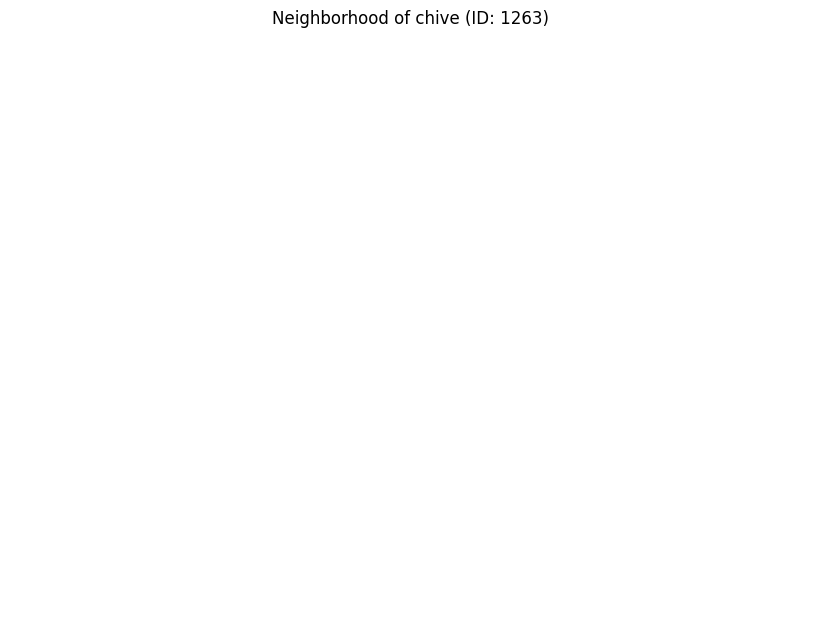

In [30]:

food_id = 1263
food_name = id_to_name[food_id]

Gsub = G.subgraph([food_id] + list(G.neighbors(food_id)))
pos = nx.spring_layout(Gsub, seed=42)

plt.figure(figsize=(8, 6))
nx.draw(
    Gsub,
    pos,
    with_labels=True,
    labels=nx.get_node_attributes(Gsub, 'name'),
    node_size=2000,
    node_color='lightblue',
    font_size=10,
    font_weight='bold',
    edge_color='gray'
)
plt.title(f'Neighborhood of {food_name} (ID: {food_id})')
plt.axis('off')
plt.show()